## Data Analytics Group Project
## __*A Data-Driven Approach for Syngenta's Crop Protection and Seed Solutions*__

### Team Members:
Arun Praseeth<br>
Shivani Bisht<br>
Nivasinii Anandhakumar<br>
Mahender Reddy Thota<br>

In [1]:
#Importing the Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### **Loading the dataset**

In [2]:
agri = pd.read_excel(r'Agri.xlsx')

#### **Understanding the Data**

**State**:      States in India<br>
**District**:   Districts in states of India<br>
**Crop**:       Various crops produced across India<br>
**Year**:       In which year the data has been recorded<br>
**Season**:     In which season of the year data has been recorded (Khariff, Rabi, Whole Year, Summer, Winter, Autumn)<br>
**Production**: Quantity of the produce<br>
**Production Units**: Measure of the Production in metrics<br>
**Area**:       Area of land cultivated <br>
**Area Units**: Metrics of the land measured<br>
**Yield**:      Production per unit of the area cultivated<br>

In [3]:
agri.head()

,State,District,Crop,Year,Season,Production,Production Units,Area,Area Units,Yield
0,Chhattisgarh,DANTEWADA,Groundnut,2000,Kharif,50.0,Tonnes,49.0,Hectare,1.020408
1,Tamil Nadu,NAGAPATTINAM,Banana,2000,Whole Year,966.0,Tonnes,38.0,Hectare,25.421053
2,Meghalaya,EAST KHASI HILLS,Turmeric,2000,Whole Year,389.0,Tonnes,61.0,Hectare,6.377049
3,Madhya Pradesh,GUNA,Coriander,2000,Whole Year,14858.0,Tonnes,58723.0,Hectare,0.253018
4,Andhra Pradesh,NALGONDA,Ragi,2000,Rabi,14.0,Tonnes,8.0,Hectare,1.750000


In [4]:
agri.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Production',
       'Production Units', 'Area', 'Area Units', 'Yield'],
      dtype='object')

### Cleaning the Data

In [5]:
agri['Production Units'].unique()

array(['Tonnes', 'Bales', 'Nuts'], dtype=object)

**Converting Production Units Bales and Nuts to Tonnes**<br>
1 Bale = 0.21772 Tonnes<br>
1 Coconut = 1.3 KG<br>
1 KG = 0.001 Tonne

In [6]:
# Conversion factors
bale_to_tonnes = 0.21772
nut_to_kg = 1.3
kg_to_tonnes = 0.001

# Creating a map for the units to conversion factors
conversion_factors = {'Tonnes': 1, 'Bales': bale_to_tonnes, 'Nuts': nut_to_kg * kg_to_tonnes}

# Applying the conversion to the 'Production' column
agri['Production'] = agri['Production'] * agri['Production Units'].map(conversion_factors)

In [7]:
#Rounding the values to 2 decimal places
agri['Production'] = agri['Production'].round(decimals=2)
agri

,State,District,Crop,Year,Season,Production,Production Units,Area,Area Units,Yield
0,Chhattisgarh,DANTEWADA,Groundnut,2000,Kharif,50.0,Tonnes,49.0,Hectare,1.020408
1,Tamil Nadu,NAGAPATTINAM,Banana,2000,Whole Year,966.0,Tonnes,38.0,Hectare,25.421053
2,Meghalaya,EAST KHASI HILLS,Turmeric,2000,Whole Year,389.0,Tonnes,61.0,Hectare,6.377049
3,Madhya Pradesh,GUNA,Coriander,2000,Whole Year,14858.0,Tonnes,58723.0,Hectare,0.253018
4,Andhra Pradesh,NALGONDA,Ragi,2000,Rabi,14.0,Tonnes,8.0,Hectare,1.750000
...,...,...,...,...,...,...,...,...,...,...
625,Uttarakhand,UTTAR KASHI,Maize,2020,Kharif,1186.0,Tonnes,530.0,Hectare,2.237736
626,Uttarakhand,ALMORA,Barley,2020,Rabi,2645.0,Tonnes,3540.0,Hectare,0.747175
627,Uttarakhand,PAURI GARHWAL,Wheat,2020,Rabi,15306.0,Tonnes,9235.0,Hectare,1.657390
628,Uttarakhand,PITHORAGARH,Masoor,2020,Rabi,2499.0,Tonnes,3404.0,Hectare,0.734136


In [8]:
agri['Area Units'].unique()

array(['Hectare'], dtype=object)

In [9]:
#Dropping the columns 'Area Units' since all values are in Hectares
agri = agri.drop(columns=['Area Units'])
# Drop the 'Production Units' column as it's no longer needed
agri = agri.drop(columns=['Production Units'])

In [10]:
agri.isnull().sum()/agri.shape[0]

State         0.000000
District      0.000000
Crop          0.000000
Year          0.000000
Season        0.000000
Production    0.012698
Area          0.000000
Yield         0.000000
dtype: float64

In [11]:
#Fill Null Values for Production based on the Yield
agri['Production'] = agri['Production'].fillna(agri['Area']*agri['Yield'])

In [12]:
#Renaming the columns 
agri.rename(columns={'Area':'Area in Hectares','Production':'Production in Tonnes'})

,State,District,Crop,Year,Season,Production in Tonnes,Area in Hectares,Yield
0,Chhattisgarh,DANTEWADA,Groundnut,2000,Kharif,50.0,49.0,1.020408
1,Tamil Nadu,NAGAPATTINAM,Banana,2000,Whole Year,966.0,38.0,25.421053
2,Meghalaya,EAST KHASI HILLS,Turmeric,2000,Whole Year,389.0,61.0,6.377049
3,Madhya Pradesh,GUNA,Coriander,2000,Whole Year,14858.0,58723.0,0.253018
4,Andhra Pradesh,NALGONDA,Ragi,2000,Rabi,14.0,8.0,1.750000
...,...,...,...,...,...,...,...,...
625,Uttarakhand,UTTAR KASHI,Maize,2020,Kharif,1186.0,530.0,2.237736
626,Uttarakhand,ALMORA,Barley,2020,Rabi,2645.0,3540.0,0.747175
627,Uttarakhand,PAURI GARHWAL,Wheat,2020,Rabi,15306.0,9235.0,1.657390
628,Uttarakhand,PITHORAGARH,Masoor,2020,Rabi,2499.0,3404.0,0.734136


In [13]:
#Recalculate the Yield based on the updated Production values
agri['Yield'] = agri['Production'] / agri['Area']

In [14]:
agri.describe()

,Year,Production,Area,Yield
count,630.000000,6.300000e+02,630.000000,630.000000
mean,2010.000000,2.534530e+04,10186.132857,8.239964
std,6.060112,9.326065e+04,33869.504024,86.321961
min,2000.000000,0.000000e+00,1.000000,0.000000
25%,2005.000000,7.700000e+01,57.000000,0.572572
50%,2010.000000,4.690000e+02,326.000000,1.058360
75%,2015.000000,5.285250e+03,2853.750000,2.879093
max,2020.000000,1.094464e+06,321753.000000,2150.000000


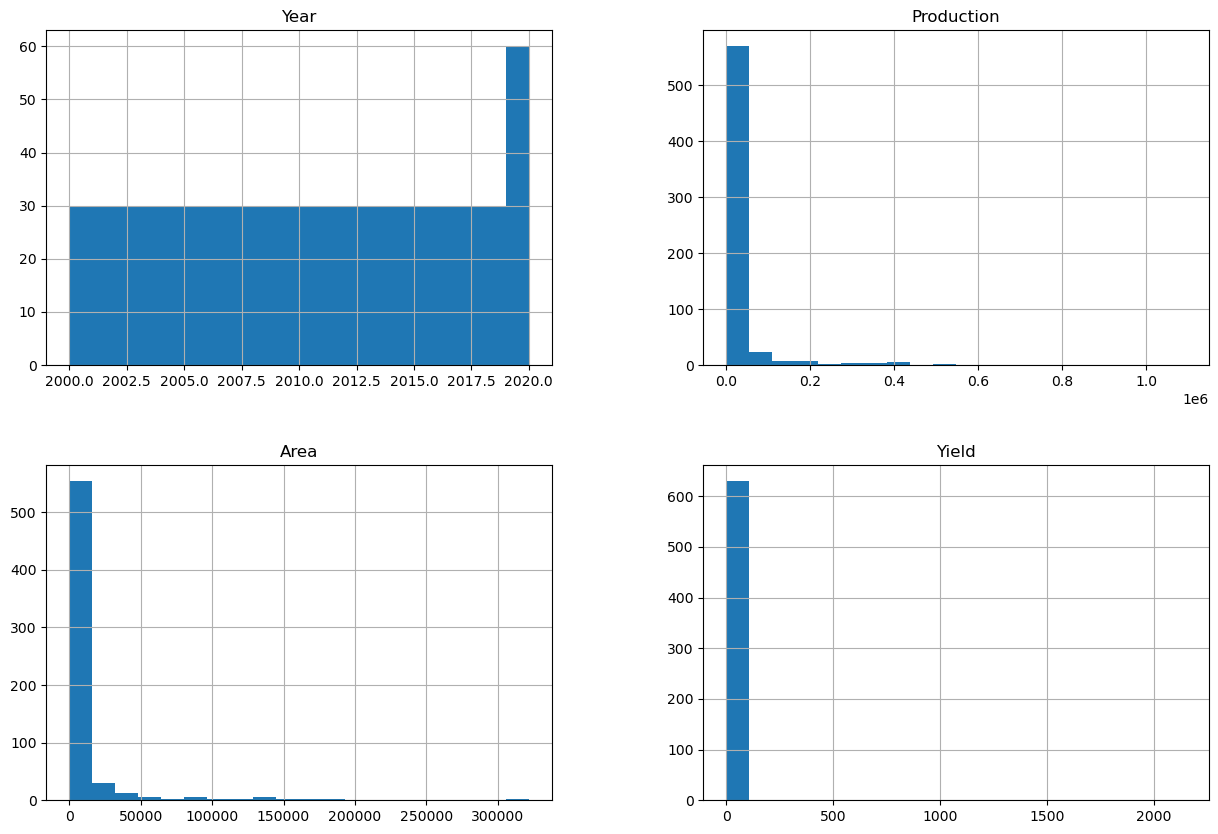

In [15]:
fig1 = agri.hist(bins=20, figsize=(15,10))

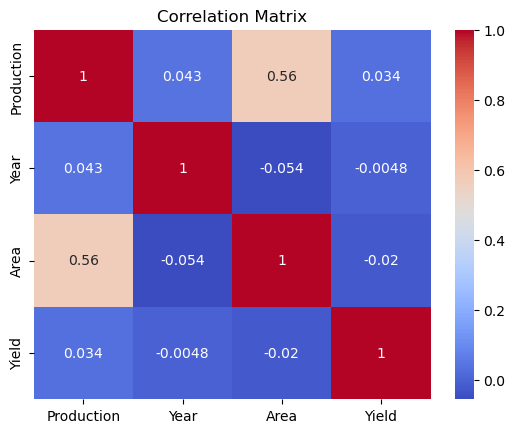

In [16]:
#Finding Correlation between the variables
correlation_matrix = agri[['Production','Year','Area','Yield']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

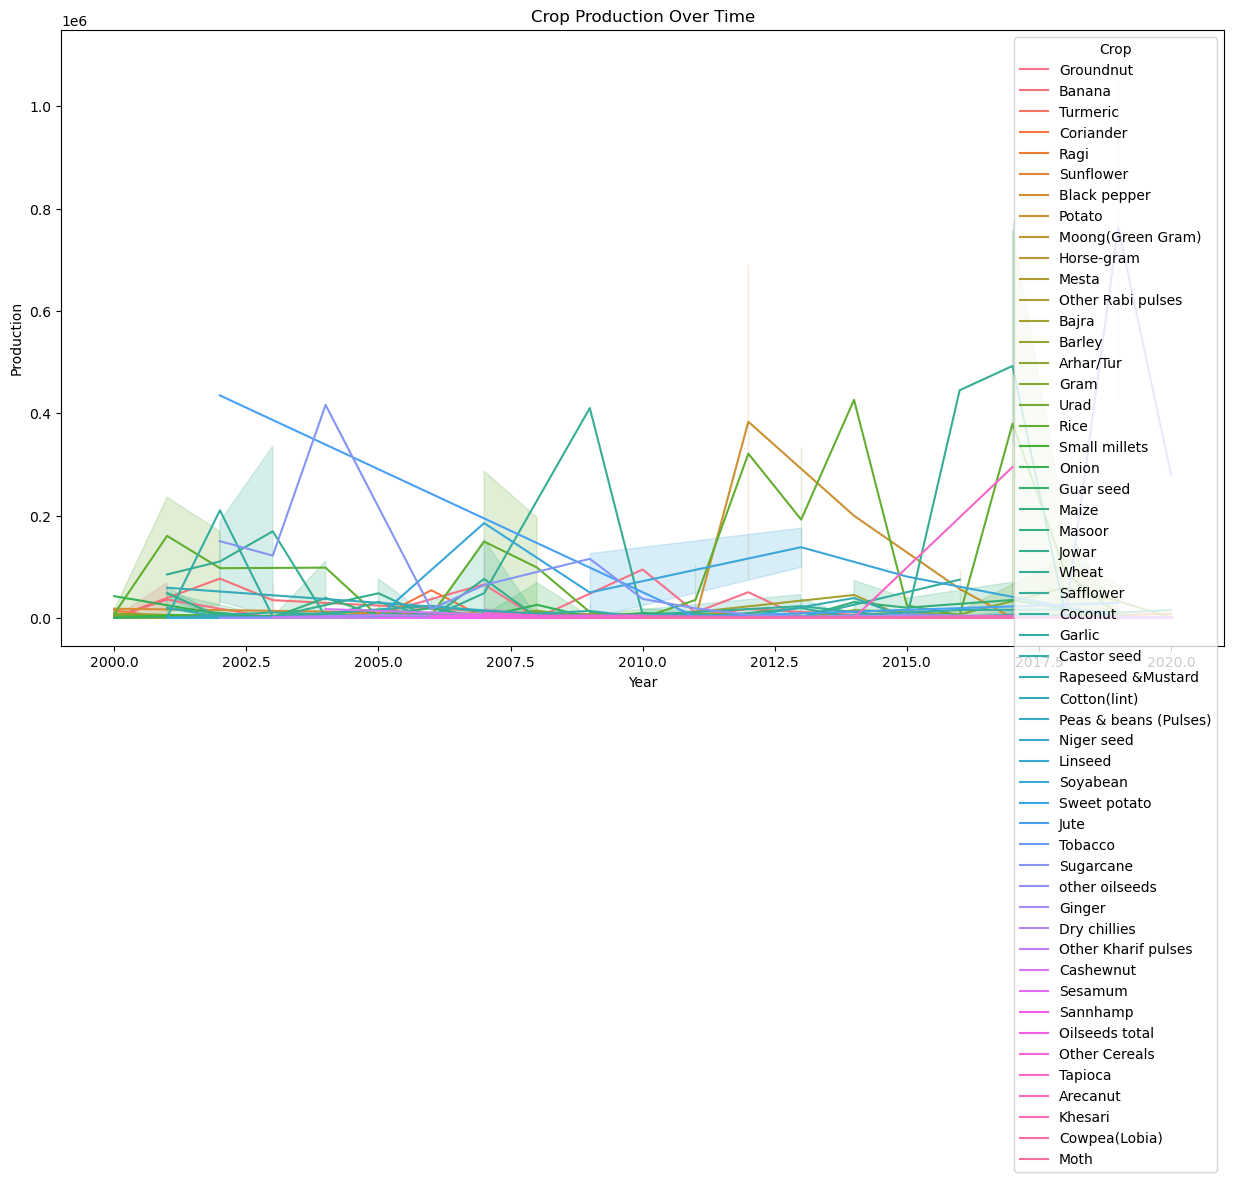

In [17]:
#Plotting Crop prodcution over time
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Production', hue='Crop', data=agri)
plt.title('Crop Production Over Time')
plt.show()

In [18]:
agri.groupby(['State','Crop'])['Production'].sum()

State                        Crop        
Andaman and Nicobar Islands  Sugarcane          254.00
Andhra Pradesh               Arecanut          3960.00
                             Arhar/Tur         4578.00
                             Bajra             1816.00
                             Cotton(lint)     58905.67
                                               ...    
West Bengal                  Linseed             19.00
                             Potato          691914.00
                             Rice            402327.00
                             Urad               112.00
                             Wheat             5444.00
Name: Production, Length: 392, dtype: float64

In [19]:
agri.groupby(['Crop'])['Production'].sum()

Crop
Arecanut                    6765.00
Arhar/Tur                  21856.00
Bajra                      51583.00
Banana                    183164.80
Barley                     45301.00
Black pepper               18195.00
Cashewnut                  17296.00
Castor seed                 3348.00
Coconut                   313487.33
Coriander                  70050.00
Cotton(lint)               69052.70
Cowpea(Lobia)                747.80
Dry chillies               18112.00
Garlic                     79475.50
Ginger                     12240.57
Gram                      263987.00
Groundnut                 324186.10
Guar seed                   7465.00
Horse-gram                  2912.50
Jowar                     392340.00
Jute                      466175.75
Khesari                      719.00
Linseed                     1754.00
Maize                     537062.20
Masoor                     12876.00
Mesta                        552.57
Moong(Green Gram)          45507.00
Moth                   

In [21]:
df = agri
production_diversity_index = df.groupby(['Year', 'State'])['Crop'].nunique().reset_index(name='ProductionDiversityIndex')
print(production_diversity_index)

     Year             State  ProductionDiversityIndex
0    2000    Andhra Pradesh                         3
1    2000             Assam                         1
2    2000             Bihar                         2
3    2000      Chhattisgarh                         1
4    2000  Himachal Pradesh                         1
..    ...               ...                       ...
307  2019          Nagaland                         1
308  2019         Rajasthan                         4
309  2019        Tamil Nadu                         1
310  2019     Uttar Pradesh                         5
311  2020       Uttarakhand                        20

[312 rows x 3 columns]


In [22]:
df['YearlyGrowthRate'] = df.groupby(['Crop', 'State'])['Production'].pct_change() * 100
print(df[['Crop', 'Year', 'State', 'YearlyGrowthRate']])

                  Crop  Year           State  YearlyGrowthRate
0            Groundnut  2000    Chhattisgarh               NaN
1               Banana  2000      Tamil Nadu               NaN
2             Turmeric  2000       Meghalaya               NaN
3            Coriander  2000  Madhya Pradesh               NaN
4                 Ragi  2000  Andhra Pradesh               NaN
..                 ...   ...             ...               ...
625              Maize  2020     Uttarakhand         20.040486
626             Barley  2020     Uttarakhand         -3.184480
627              Wheat  2020     Uttarakhand        -68.301371
628             Masoor  2020     Uttarakhand       1751.111111
629  Other Rabi pulses  2020     Uttarakhand        -85.714286

[630 rows x 4 columns]


In [23]:
agri['Production_per_Hectare'] = agri['Production'] / agri['Area']

# Find the crop with the highest production per hectare
crop_highest_yield = agri.groupby('Crop')['Production_per_Hectare'].mean().idxmax()
print(f"Crop with the highest Average production per hectare: {crop_highest_yield}")

Crop with the highest Average production per hectare: Onion


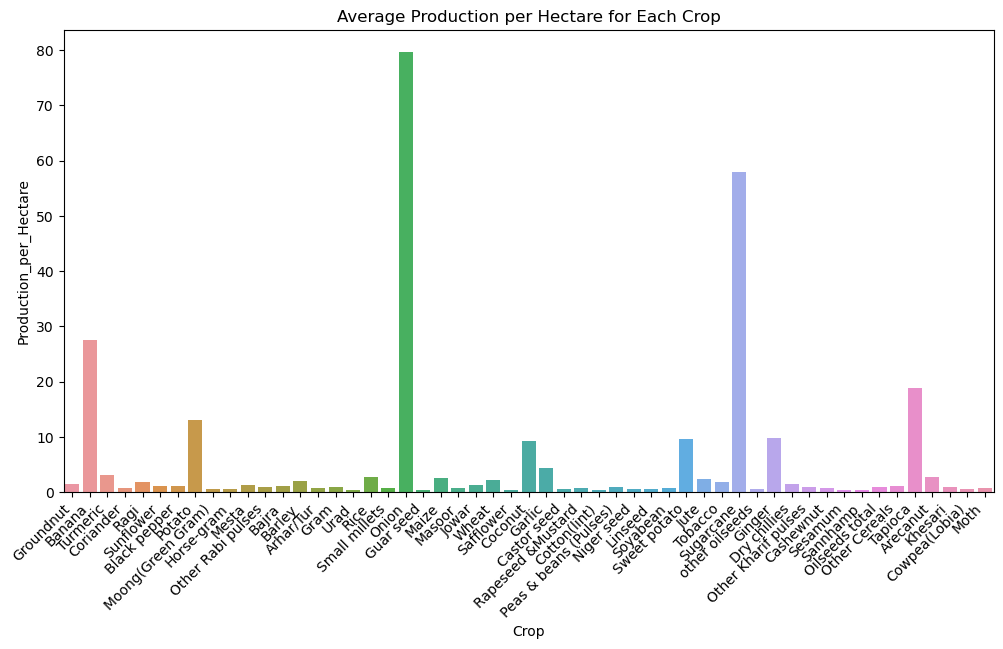

In [24]:
# Visualize the average production per hectare for each crop
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Production_per_Hectare', data=agri, errorbar=None)
plt.title('Average Production per Hectare for Each Crop')
plt.xticks(rotation=45, ha='right')
plt.show()

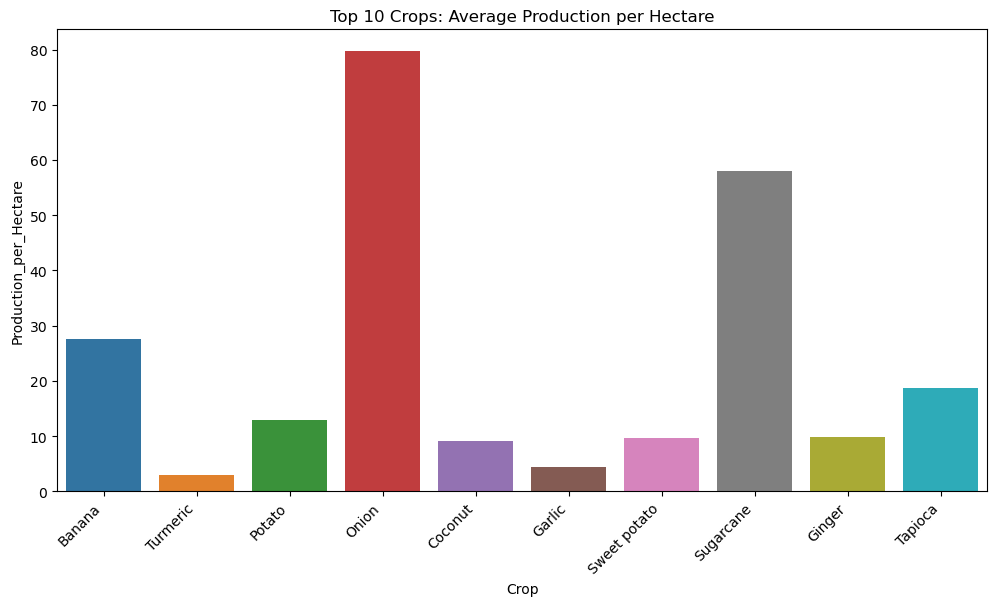

In [25]:
# Get the top 10 crops with highest production per hectare
top_10_yield_crops = df.groupby('Crop')['Production_per_Hectare'].mean().nlargest(10).index

# Filter the DataFrame for the top 10 crops
df_top_10_yield = df[df['Crop'].isin(top_10_yield_crops)]

# Visualize the average production per hectare for the top 10 crops
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Production_per_Hectare', data=df_top_10_yield, errorbar=None)
plt.title('Top 10 Crops: Average Production per Hectare')
plt.xticks(rotation=45, ha='right')
plt.show()

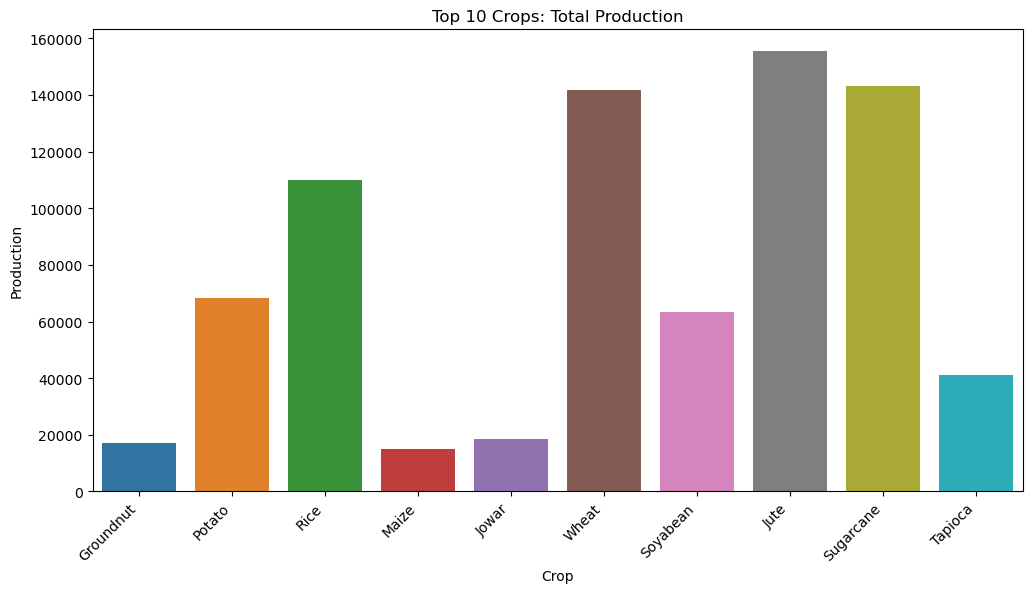

In [26]:
# Get the top 10 crops with highest production
top_10_production_crops = df.groupby('Crop')['Production'].sum().nlargest(10).index

# Filter the DataFrame for the top 10 crops
df_top_10_production = df[df['Crop'].isin(top_10_production_crops)]

# Visualize total production for the top 10 crops
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Production', data=df_top_10_production, errorbar=None)
plt.title('Top 10 Crops: Total Production')
plt.xticks(rotation=45, ha='right')
plt.show()

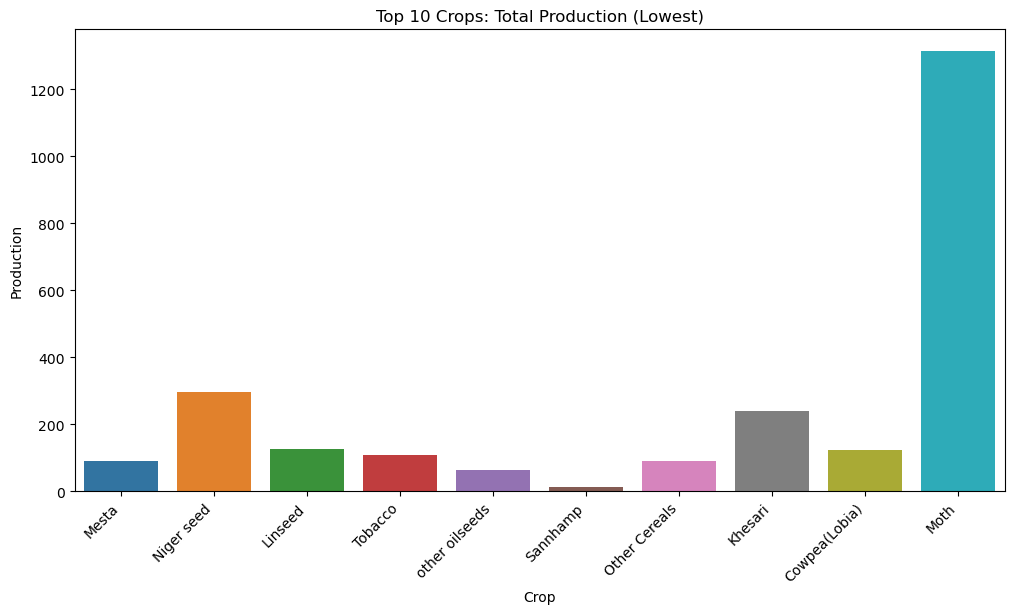

In [27]:
# Get the top 10 crops with lowest production
top_10_lowest_production_crops = df.groupby('Crop')['Production'].sum().nsmallest(10).index

# Filter the DataFrame for the top 10 crops
df_top_10_lowest_production = df[df['Crop'].isin(top_10_lowest_production_crops)]

# Visualize total production for the top 10 crops
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Production', data=df_top_10_lowest_production, errorbar=None)
plt.title('Top 10 Crops: Total Production (Lowest)')
plt.xticks(rotation=45, ha='right')
plt.show()

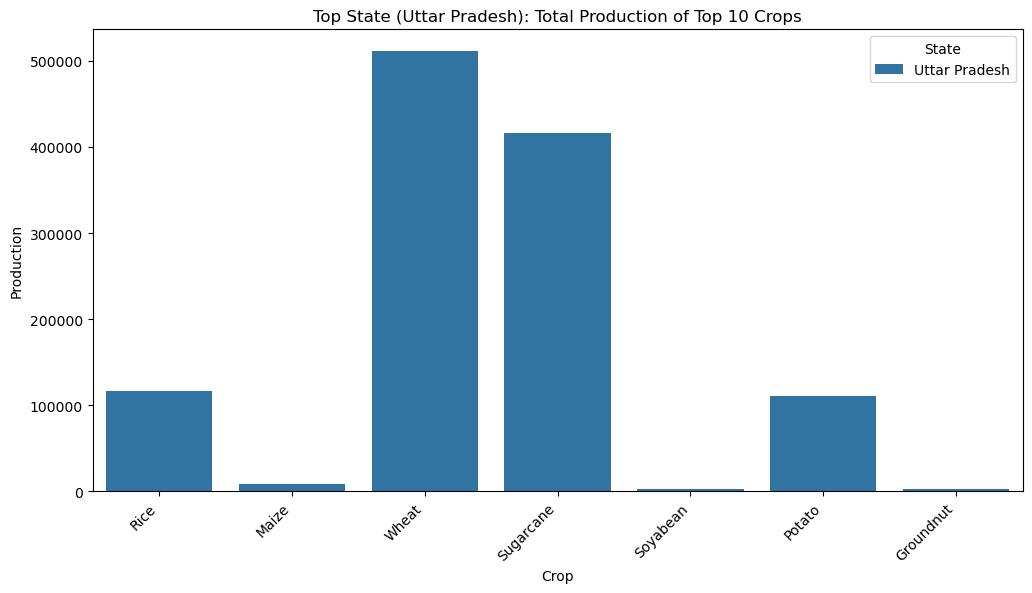

In [28]:
# Get the top 10 crops with highest production
top_10_production_crops = df.groupby('Crop')['Production'].sum().nlargest(10).index

# Filter the DataFrame for the top 10 crops
df_top_10_production = df[df['Crop'].isin(top_10_production_crops)]

# Get the state with the highest production of top 10 crops
top_state_highest_production = df_top_10_production.groupby('State')['Production'].sum().idxmax()

# Filter the DataFrame for the top state
df_top_state_production = df_top_10_production[df_top_10_production['State'] == top_state_highest_production]

# Visualize total production for the top state of the top 10 crops
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Production', hue='State', data=df_top_state_production, errorbar=None)
plt.title(f'Top State ({top_state_highest_production}): Total Production of Top 10 Crops')
plt.xticks(rotation=45, ha='right')
plt.show()

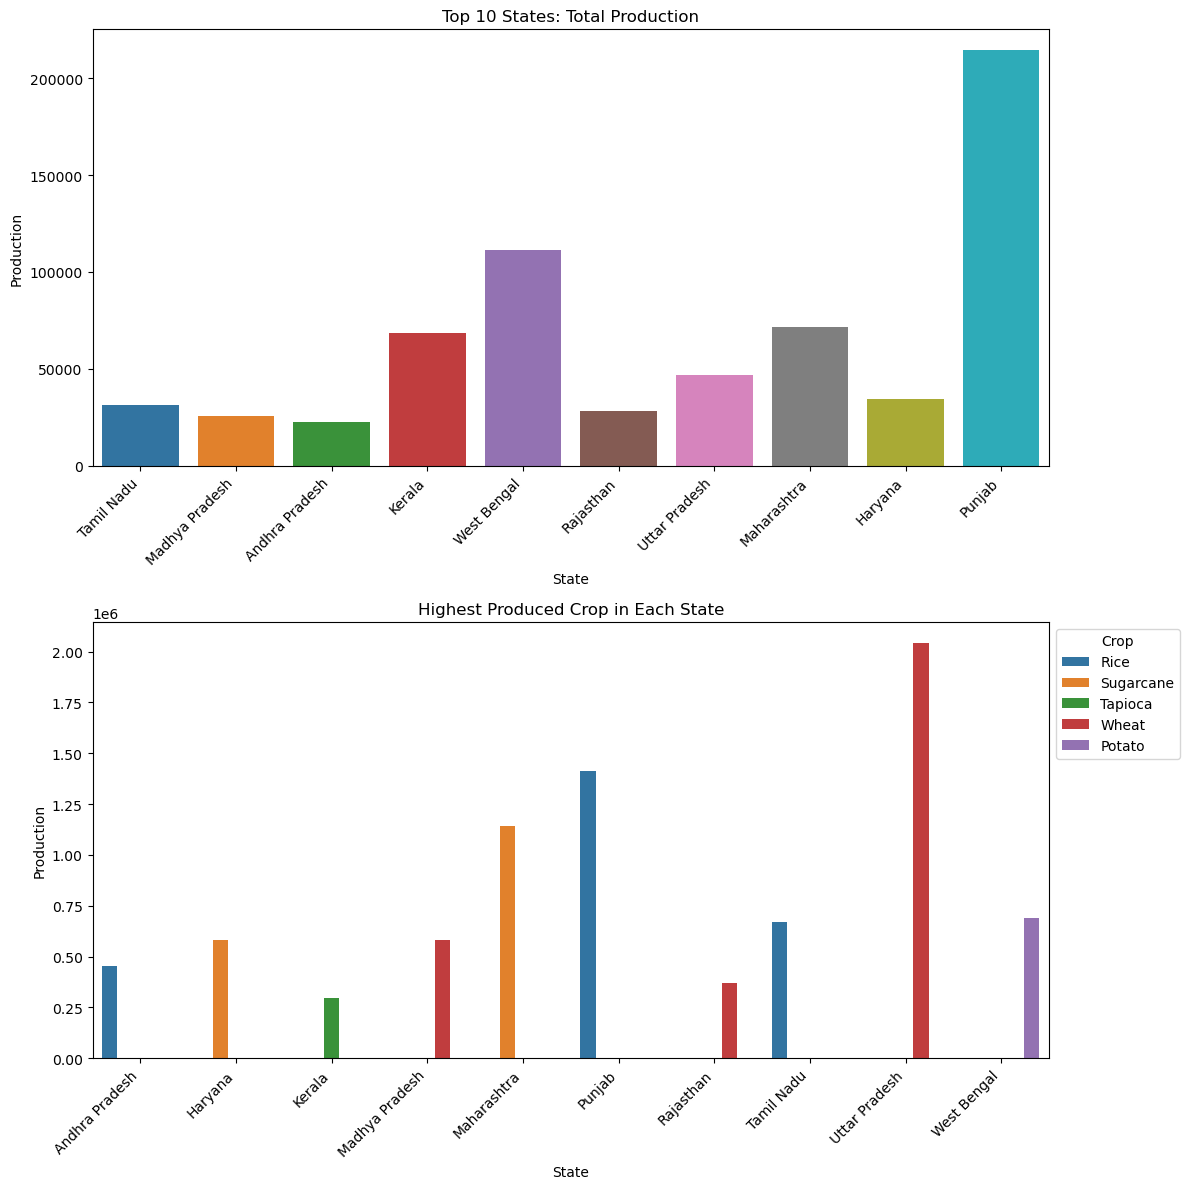

In [29]:
# Get the top 10 states with highest production
top_10_states_production = df.groupby('State')['Production'].sum().nlargest(10).index

# Filter the DataFrame for the top 10 states
df_top_10_states_production = df[df['State'].isin(top_10_states_production)]

# Get the highest produced crop in each of the top 10 states
top_crop_in_each_state = df_top_10_states_production.groupby(['State', 'Crop'])['Production'].sum().reset_index()
idx = top_crop_in_each_state.groupby('State')['Production'].idxmax()
top_crop_in_each_state = top_crop_in_each_state.loc[idx]

# Visualize total production for the top 10 states and the highest produced crop in each state
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Top 10 States by Production
sns.barplot(x='State', y='Production', data=df_top_10_states_production, errorbar=None, ax=axes[0])
axes[0].set_title('Top 10 States: Total Production')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Highest Produced Crop in Each State
sns.barplot(x='State', y='Production', hue='Crop', data=top_crop_in_each_state, errorbar=None, ax=axes[1])
axes[1].set_title('Highest Produced Crop in Each State')
axes[1].legend(title='Crop', bbox_to_anchor=(1, 1))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

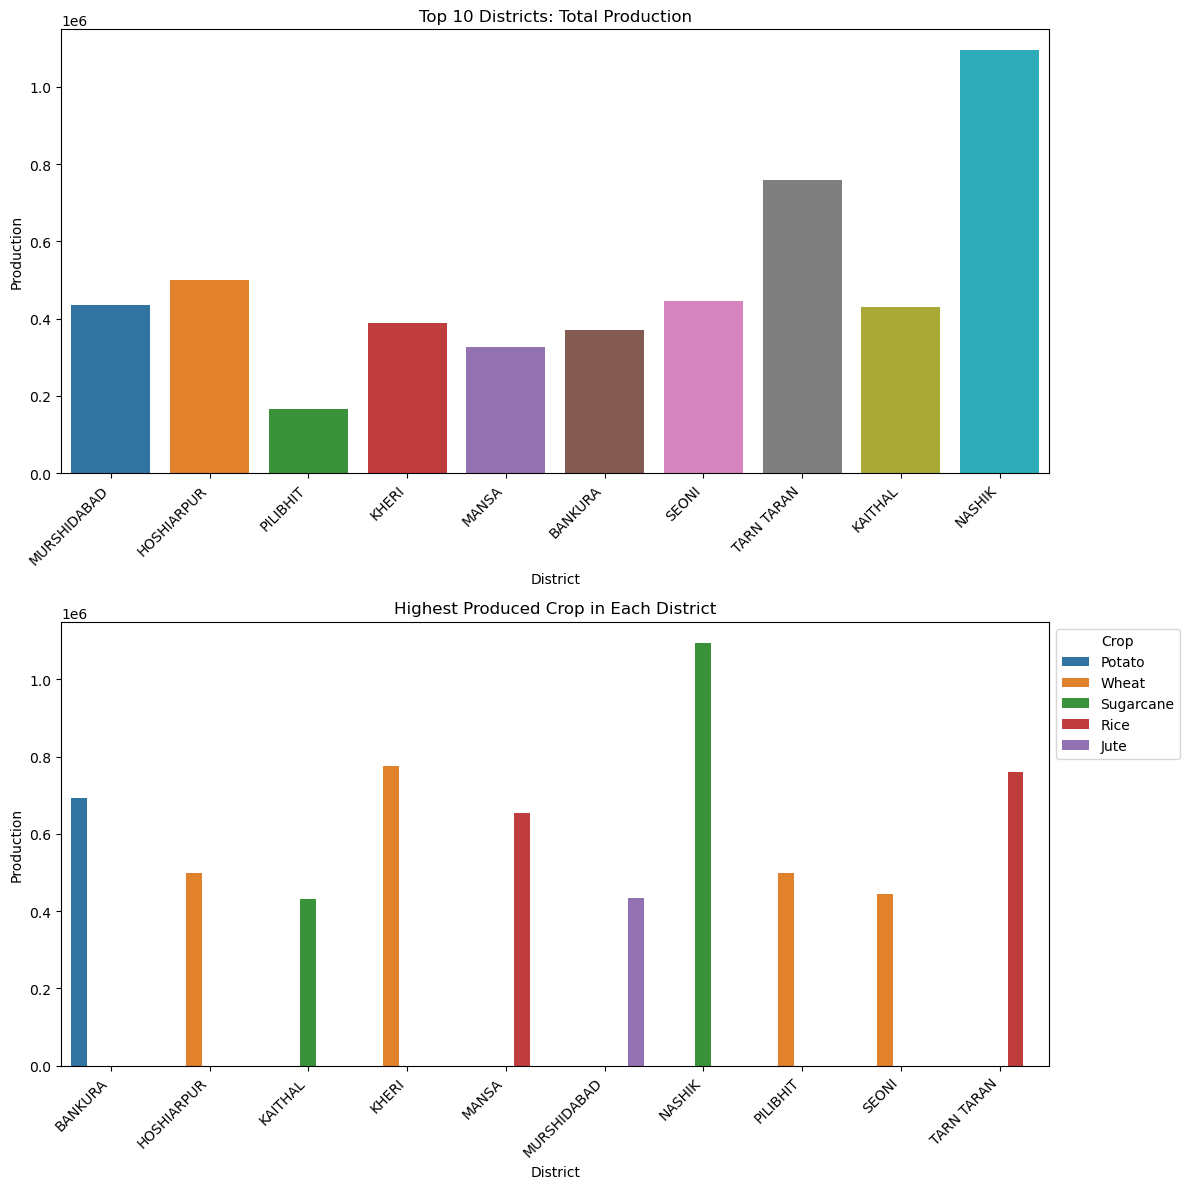

In [30]:
# Get the top 10 states with highest production
top_10_dist_production = df.groupby('District')['Production'].sum().nlargest(10).index

# Filter the DataFrame for the top 10 states
df_top_10_dist_production = df[df['District'].isin(top_10_dist_production)]

# Get the highest produced crop in each of the top 10 states
top_crop_in_each_dist = df_top_10_dist_production.groupby(['District', 'Crop'])['Production'].sum().reset_index()
idx = top_crop_in_each_dist.groupby('District')['Production'].idxmax()
top_crop_in_each_dist = top_crop_in_each_dist.loc[idx]

# Visualize total production for the top 10 states and the highest produced crop in each state
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Top 10 States by Production
sns.barplot(x='District', y='Production', data=df_top_10_dist_production, errorbar=None, ax=axes[0])
axes[0].set_title('Top 10 Districts: Total Production')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Highest Produced Crop in Each State
sns.barplot(x='District', y='Production', hue='Crop', data=top_crop_in_each_dist, errorbar=None, ax=axes[1])
axes[1].set_title('Highest Produced Crop in Each District')
axes[1].legend(title='Crop', bbox_to_anchor=(1, 1))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

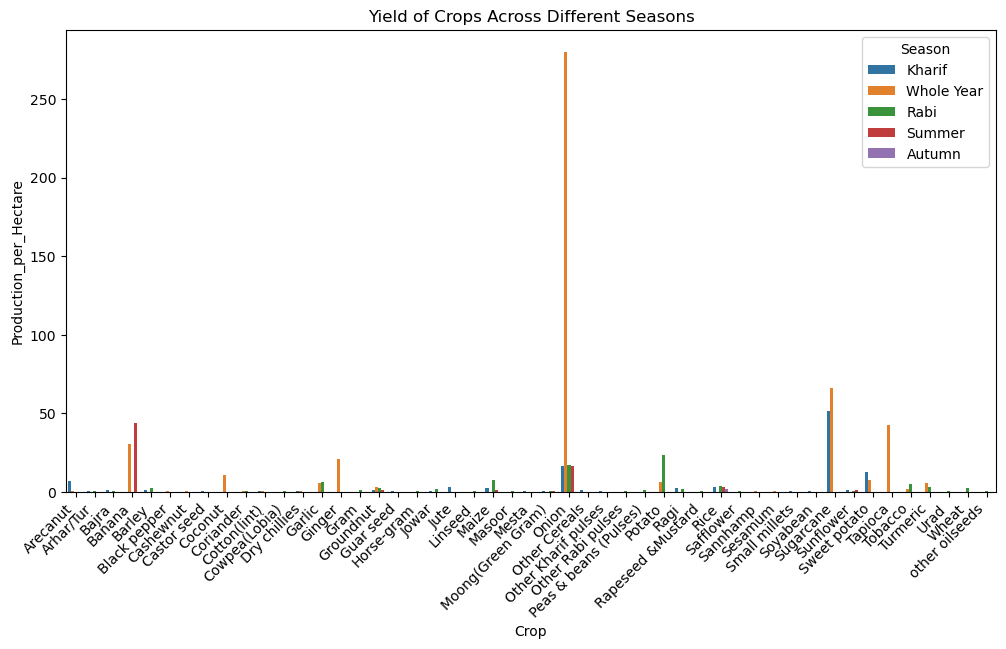

In [32]:
# Group by Crop and Season, calculating the mean yield for each combination
crop_season_yield = df_top_10_states_production.groupby(['Crop', 'Season'])['Production_per_Hectare'].mean().reset_index()

# Pivot the table for better visualization
pivot_crop_season_yield = crop_season_yield.pivot(index='Crop', columns='Season', values='Production_per_Hectare')

# Identify the best season for each crop
best_season_for_crop = pivot_crop_season_yield.idxmax(axis=1)

# Plot the best season for each crop
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Production_per_Hectare', hue='Season', data=crop_season_yield)
plt.title('Yield of Crops Across Different Seasons')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
# Display the best season for each crop
print("Best Season for Each Crop:")
print(best_season_for_crop)

Best Season for Each Crop:
Crop
Arecanut                     Kharif
Arhar/Tur                    Kharif
Bajra                        Kharif
Banana                       Summer
Barley                         Rabi
Black pepper             Whole Year
Cashewnut                Whole Year
Castor seed                  Kharif
Coconut                  Whole Year
Coriander                Whole Year
Cotton(lint)                 Kharif
Cowpea(Lobia)                  Rabi
Dry chillies             Whole Year
Garlic                         Rabi
Ginger                   Whole Year
Gram                           Rabi
Groundnut                Whole Year
Guar seed                    Kharif
Horse-gram                     Rabi
Jowar                          Rabi
Jute                         Kharif
Linseed                        Rabi
Maize                          Rabi
Masoor                         Rabi
Mesta                        Kharif
Moong(Green Gram)            Summer
Onion                    Whole Y

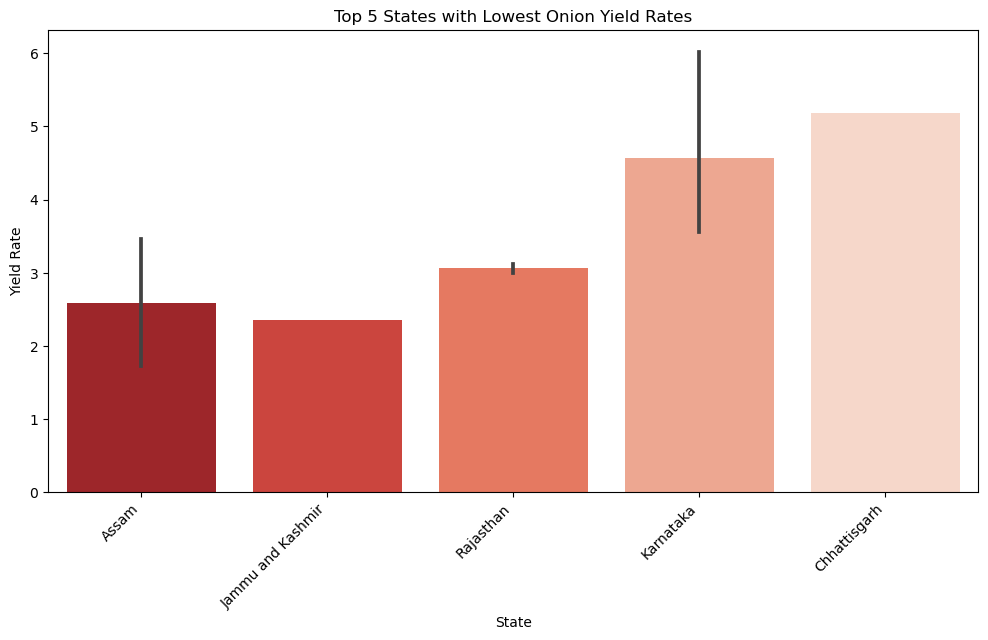

In [34]:
# Filter rows for onion crops
onion_data = df[df['Crop'] == 'Onion']

# Sort the data by yield rate in ascending order
lowest_yield_states = onion_data.sort_values(by='Yield').head(10)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Yield', data=lowest_yield_states, palette='Reds_r')
plt.title('Top 5 States with Lowest Onion Yield Rates')
plt.xlabel('State')
plt.ylabel('Yield Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

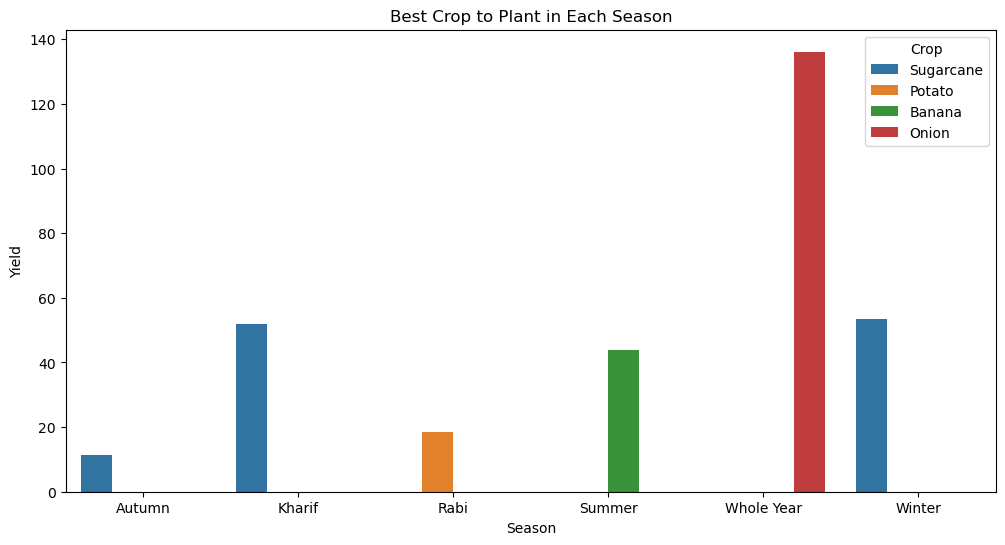

In [35]:
# Group by Season and Crop, calculating the mean yield for each combination
seasonal_crop_yield = df.groupby(['Season', 'Crop'])['Yield'].mean().reset_index()

# Find the crop with the highest average yield in each season
best_crop_in_each_season = seasonal_crop_yield.loc[seasonal_crop_yield.groupby('Season')['Yield'].idxmax()]

# Plot the best crop to plant in each season
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Yield', hue='Crop', data=best_crop_in_each_season)
plt.title('Best Crop to Plant in Each Season')
plt.show()

In [36]:
# Display the best crop to plant in each season
print("Best Crop to Plant in Each Season:")
print(best_crop_in_each_season)

Best Crop to Plant in Each Season:
         Season       Crop       Yield
2        Autumn  Sugarcane   11.441441
32       Kharif  Sugarcane   51.760945
60         Rabi     Potato   18.426508
72       Summer     Banana   44.000000
97   Whole Year      Onion  136.166457
114      Winter  Sugarcane   53.463481


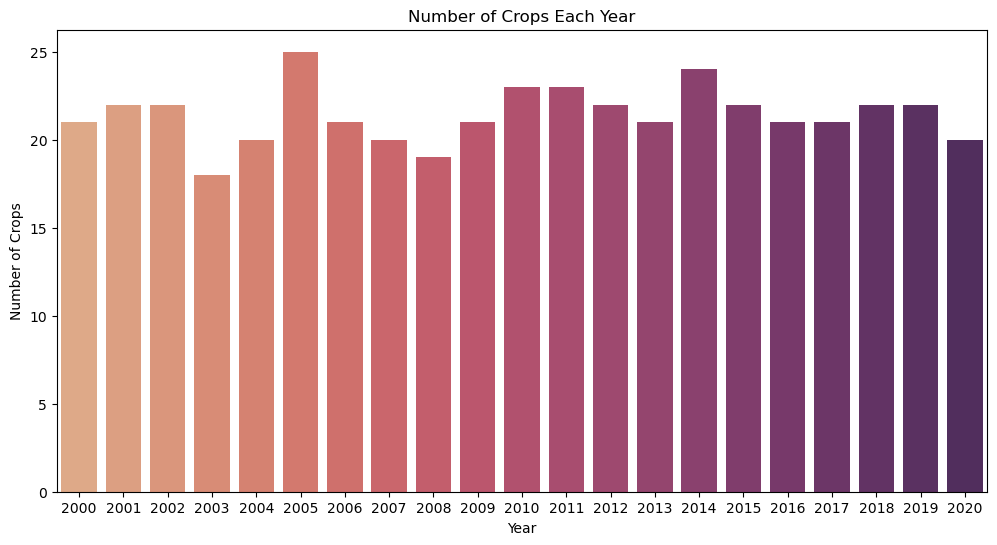

In [37]:
# Count the number of unique crops for each year
crops_per_year = df.groupby('Year')['Crop'].nunique().reset_index()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Crop', data=crops_per_year, palette='flare')
plt.title('Number of Crops Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Crops')
plt.show()

In [38]:
# Calculate the Production Efficiency Index for each unique combination of "Crop," "Year," and "State"
df['Production Efficiency Index'] = df['Production'] / df['Area']

# Display the result
print(df[['Crop', 'Year', 'State', 'Production Efficiency Index']])

                  Crop  Year           State  Production Efficiency Index
0            Groundnut  2000    Chhattisgarh                     1.020408
1               Banana  2000      Tamil Nadu                    25.421053
2             Turmeric  2000       Meghalaya                     6.377049
3            Coriander  2000  Madhya Pradesh                     0.253018
4                 Ragi  2000  Andhra Pradesh                     1.750000
..                 ...   ...             ...                          ...
625              Maize  2020     Uttarakhand                     2.237736
626             Barley  2020     Uttarakhand                     0.747175
627              Wheat  2020     Uttarakhand                     1.657390
628             Masoor  2020     Uttarakhand                     0.734136
629  Other Rabi pulses  2020     Uttarakhand                     1.000000

[630 rows x 4 columns]
